In [19]:
from __future__ import division
import sys, os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Ellipse

In [20]:
burst      = 'bn080916009'
data_dir   = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst

nullfile   = "fakeit_fitresults_grbm_-01-.fit"
altfile1    = "fakeit_fitresults_grbm_-01-_vs_sbpl_-01-.fit"
modname    = altfile2.split('_')[2]

In [21]:
null       = os.path.join(data_dir, nullfile)
alt1       = os.path.join(data_dir, altfile)

data_null = pyfits.open(null)
data_alt = pyfits.open(alt1)

# NULL

In [22]:
iter = 0
Data_N = pd.DataFrame()
for name in data_null[1].data.columns.names:
    Data_N["%s"%name] = data_null[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter

Data_N = Data_N.astype('float64')

for name in Data_N.columns:
    x = Data_N["%s"%name]
    muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
#     print "%s"%name
#     print "Mean Value:    %.13f"%muX
#     print "Sigma value:   %.13f"%sigmaX
#     print "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
#     print "2-sigma:  %.10f, %.10f"%(muX - 2*sigmaX, muX + 2*sigmaX)
#     print "3-sigma:  %.10f, %.10f"%(muX - 3*sigmaX, muX + 3*sigmaX)
#     print ""

# Alternative

In [23]:
iter = 0
Data_A = pd.DataFrame()
for name in data_alt[1].data.columns.names:
    Data_A["%s"%name] = data_alt[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter

Data_A = Data_A.astype('float64')

for name in Data_A.columns:
    x = Data_A["%s"%name]
    muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
#     print "%s"%name
#     print "Mean Value:    %.13f"%muX
#     print "Sigma value:   %.13f"%sigmaX
#     print "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
#     print "2-sigma:  %.10f, %.10f"%(muX - 2*sigmaX, muX + 2*sigmaX)
#     print "3-sigma:  %.10f, %.10f"%(muX - 3*sigmaX, muX + 3*sigmaX)
#     print ""

### Incase a fit of the alternative to the null model's data set provides outrageously large CSTAT, we provide a way to filter those.

In [49]:
Data_A["BIC"][0:10]

0    428.674620
1    439.112515
2    454.946604
3    433.957450
4    442.262730
5    385.853664
6    384.677964
7    422.071812
8    404.952837
9    397.938500
Name: BIC, dtype: float64

In [50]:
Data_N["BIC"][0:10]

0    422.640805
1    439.099291
2    451.011710
3    432.497471
4    443.391155
5    383.468811
6    382.624934
7    418.724306
8    400.062101
9    393.766981
Name: BIC, dtype: float64

In [39]:
LRT_1 = (Data_N["CSTAT"] - Data_A["CSTAT"])
LRT_2 = (Data_N["CSTAT"] - Data_A["CSTAT"])/2.  # without the traditional factor of 2.
AIC = (Data_A["AIC"] - Data_N["AIC"])
BIC = (Data_A["BIC"] - Data_N["BIC"])

In [40]:
#TEST1 = filter(lambda x: x > 0.5, TEST1)

In [41]:
def Plot_ParamDistributions(x, Xlimits=None, bins=100):
    #XLabel = str(parameter)

    x = x
    mu, sigma = np.mean(x), np.sqrt(np.var(x))
    
    fig = plt.figure(figsize = (11,7))
    ax = fig.add_subplot(111)

    n, bins, patches = ax.hist(x, bins, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])

    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, mu, sigma)


    x1siglo = mu-sigma
    x1sighi = mu+sigma
    x2siglo = mu-2*sigma
    x2sighi = mu+2*sigma
    x3siglo = mu-3*sigma
    x3sighi = mu+3*sigma

    ax.get_xlim()
    ylow, yhi = ax.get_ylim()
    ylabelpos = yhi - (yhi*.01)
    yhigh = yhi + (yhi*.1)
    #ylow, yhigh = ax.yaxis.get_data_interval()
    ax.vlines(mu, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu+sigma, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu-sigma, ylow, yhigh, linestyle='--', color="black") # mu - sigma
    ax.vlines(mu+2*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 2*sigma
    ax.vlines(mu-2*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 2*sigma
    ax.vlines(mu+3*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 3*sigma
    ax.vlines(mu-3*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 3*sigma
    #ax.text(x,y, "text")
    ax.text(mu, ylabelpos, r"$\mu$", fontsize = 12, horizontalalignment='center')
    ax.text(x1sighi, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x1siglo, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2sighi, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2siglo, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3sighi, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3siglo, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.set_ylim(ylow, yhigh)
    
    if Xlimits is not None:
        ax.set_xlim(Xlimits)
    else:
        ax.set_xlim(mu-5*sigma, mu+5*sigma)
    
    ax.plot(bincenters, y, 'r--', linewidth=1)
    #ax.set_xlabel('%s'%XLabel)
    #ax.set_title('%s'%modelname)


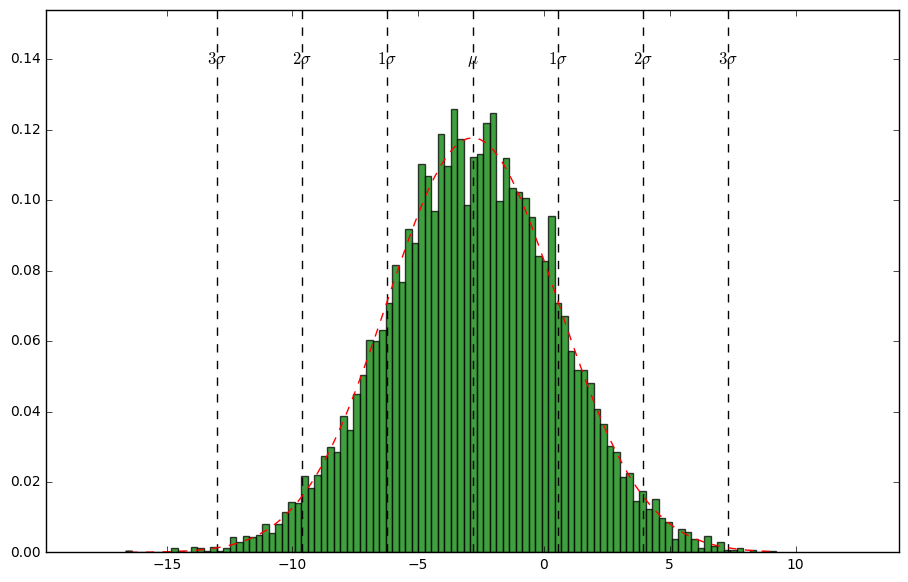

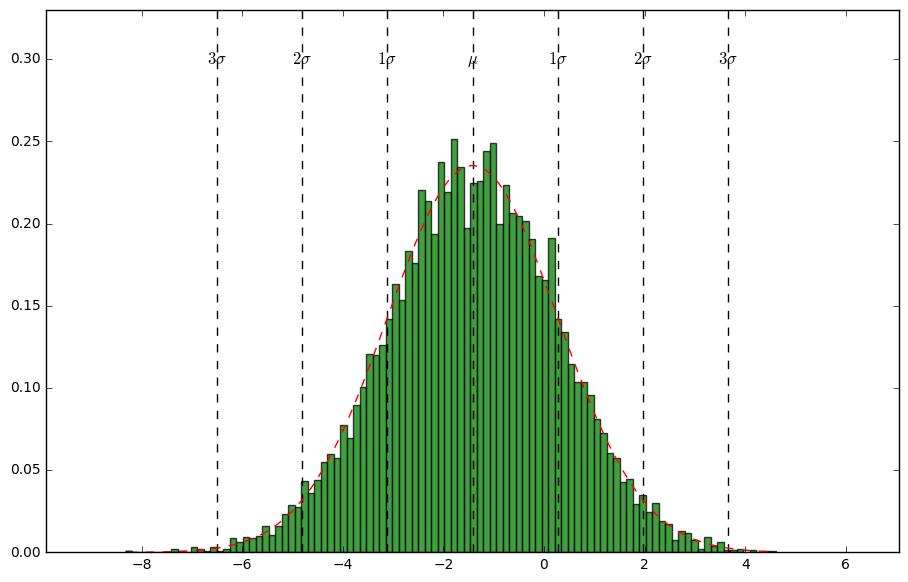

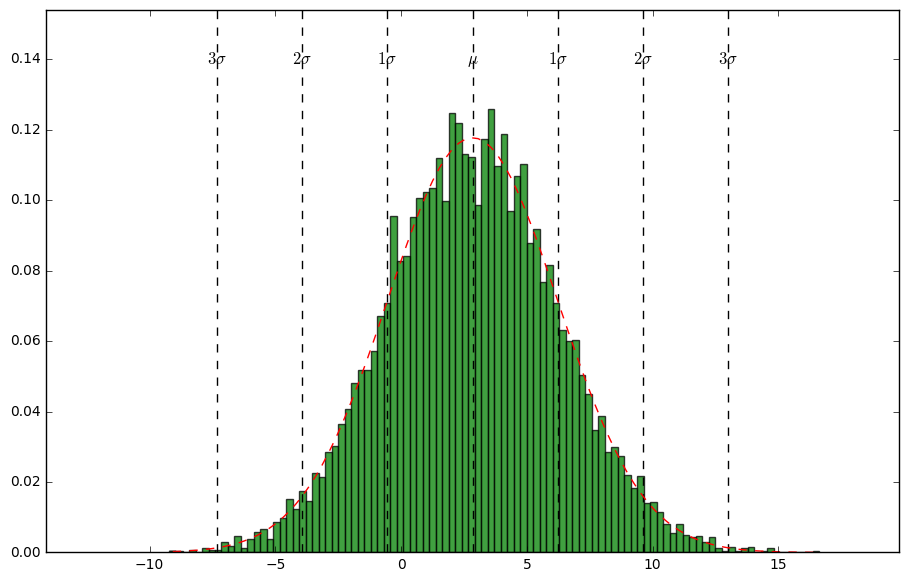

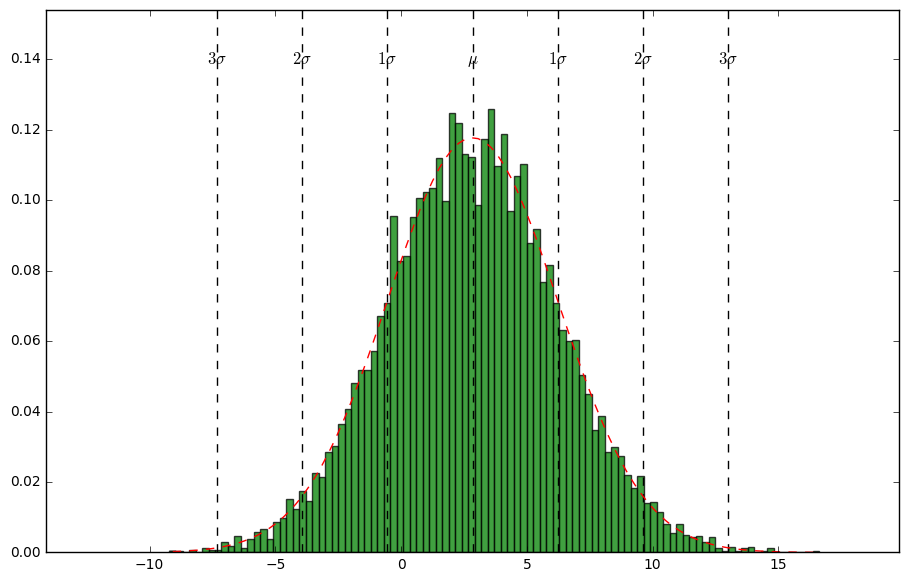

In [42]:
tests = [LRT_1, LRT_2, AIC, BIC]
for test in tests:
    Plot_ParamDistributions(x= test, Xlimits = None, bins=100)

In [43]:
for test in tests:
    print test.mean()

-2.83927422522
-1.41963711261
2.83927422522
2.83927422522


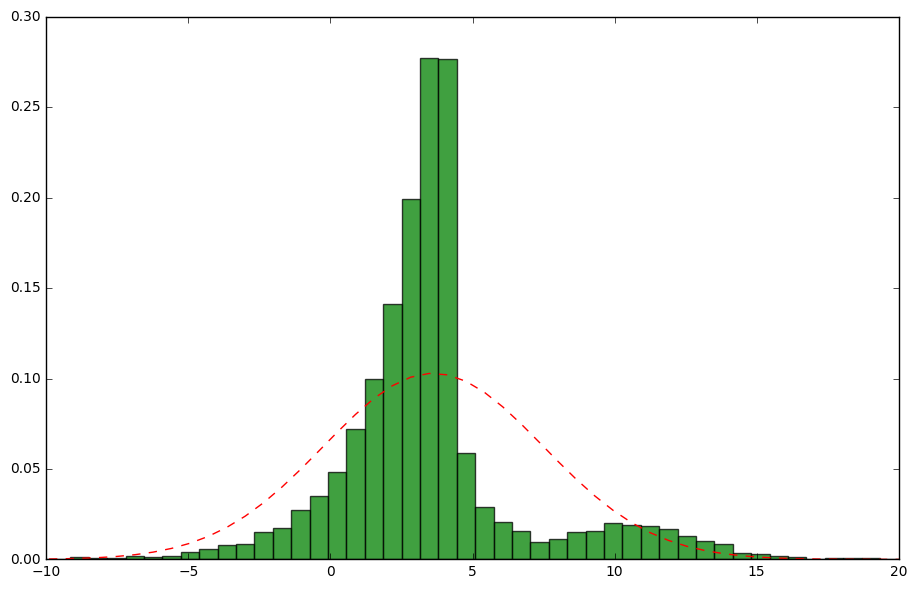

In [174]:
Plot_ParamDistributions(x= TEST2, Xlimits = [-10, 20], bins=200)

In [175]:
np.mean(TEST2)

3.6191322370665779

In [176]:
np.mean(TEST3)

11.499474742507443

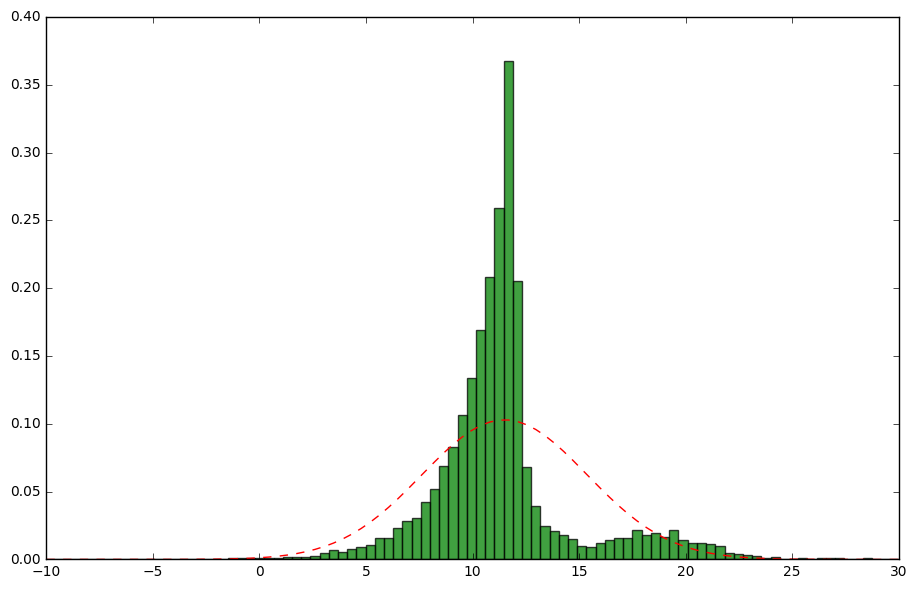

In [177]:
Plot_ParamDistributions(x= TEST3, Xlimits = [-10,30], bins=300)

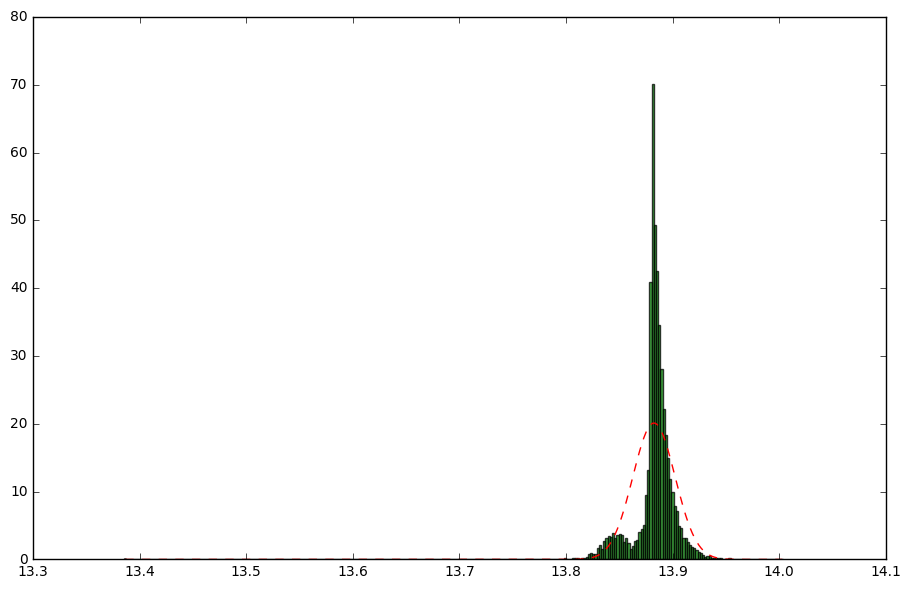

In [181]:
Plot_ParamDistributions(x= TEST4, Xlimits=None, bins=300)

In [179]:
np.mean(TEST4)

13.882555768052733

In [48]:
iter = 0
Bdata = pd.DataFrame()
for name in Fdata[1].data.columns.names:
    Bdata["%s"%name] = Fdata[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter

In [49]:
Bdata = Bdata.astype('float64')

In [51]:
Bdata = Bdata[Bdata["CSTAT"] < 500.0]

In [52]:
for name in Bdata.columns:
    x = Bdata["%s"%name]
    muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
    print "%s"%name
    print "Mean Value:    %.13f"%muX
    print "Sigma value:   %.13f"%sigmaX
    print "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
    print "2-sigma:  %.10f, %.10f"%(muX - 2*sigmaX, muX + 2*sigmaX)
    print "3-sigma:  %.10f, %.10f"%(muX - 3*sigmaX, muX + 3*sigmaX)
    print ""

PARAM1
Mean Value:    -1.0605438452670
Sigma value:   0.0366960993936
1-sigma:  -1.0972399446606, -1.0238477458734
2-sigma:  -1.1339360441, -0.9871516465
3-sigma:  -1.1706321434, -0.9504555471

PARAM2
Mean Value:    -2.2026649926069
Sigma value:   0.0149749494938
1-sigma:  -2.2176399421007, -2.1876900431131
2-sigma:  -2.2326148916, -2.1727150936
3-sigma:  -2.2475898411, -2.1577401441

PARAM3
Mean Value:    600.6350930373618
Sigma value:   90.9842038829554
1-sigma:  509.6508891544064, 691.6192969203172
2-sigma:  418.6666852715, 782.6035008033
3-sigma:  327.6824813885, 873.5877046862

PARAM4
Mean Value:    0.0165385098951
Sigma value:   0.0009376231745
1-sigma:  0.0156008867206, 0.0174761330696
2-sigma:  0.0146632635, 0.0184137562
3-sigma:  0.0137256404, 0.0193513794

PARAM5
Mean Value:    39.3502943114328
Sigma value:   29.6902118433493
1-sigma:  9.6600824680836, 69.0405061547821
2-sigma:  -20.0301293753, 98.7307179981
3-sigma:  -49.7203412186, 128.4209298415

PARAM6
Mean Value:    0.00

In [11]:
#pp = PdfPages(outfile)

In [28]:
def Plot_ParamComparison(modelname, ax, one, two):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    
    XLabel = 'PARAM%i'%(one)
    YLabel = 'PARAM%i'%(two)

    x = Bdata["%s"%XLabel]
    y = Bdata["%s"%YLabel]
    muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
    muY, sigmaY = np.mean(y), np.sqrt(np.var(y))

    cov = np.cov(x, y)

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    for j in xrange(1, 4):
        width = 2 * j * np.sqrt(vals)[0]
        height = 2 * j * np.sqrt(vals)[1]
        ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                      width= width, height= height,
                      angle= theta)
        ell.set_facecolor('none')
        ax.add_artist(ell)

    plt.errorbar(np.mean(x), np.mean(y), xerr= 3*sigmaX, yerr= 3*sigmaY, color='green', lw=2)
    plt.errorbar(np.mean(x), np.mean(y), xerr= 2*sigmaX, yerr= 2*sigmaY, color='blue', lw=2)
    plt.errorbar(np.mean(x), np.mean(y), xerr= sigmaX, yerr= sigmaY, color='red', lw=2)
    plt.hexbin(x, y, bins='log', gridsize=40, cmap=plt.cm.Greys)#, alpha = 0.1)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.xlabel("%s"%XLabel)
    plt.ylabel("%s"%YLabel)
    plt.title("%s"%modelname)


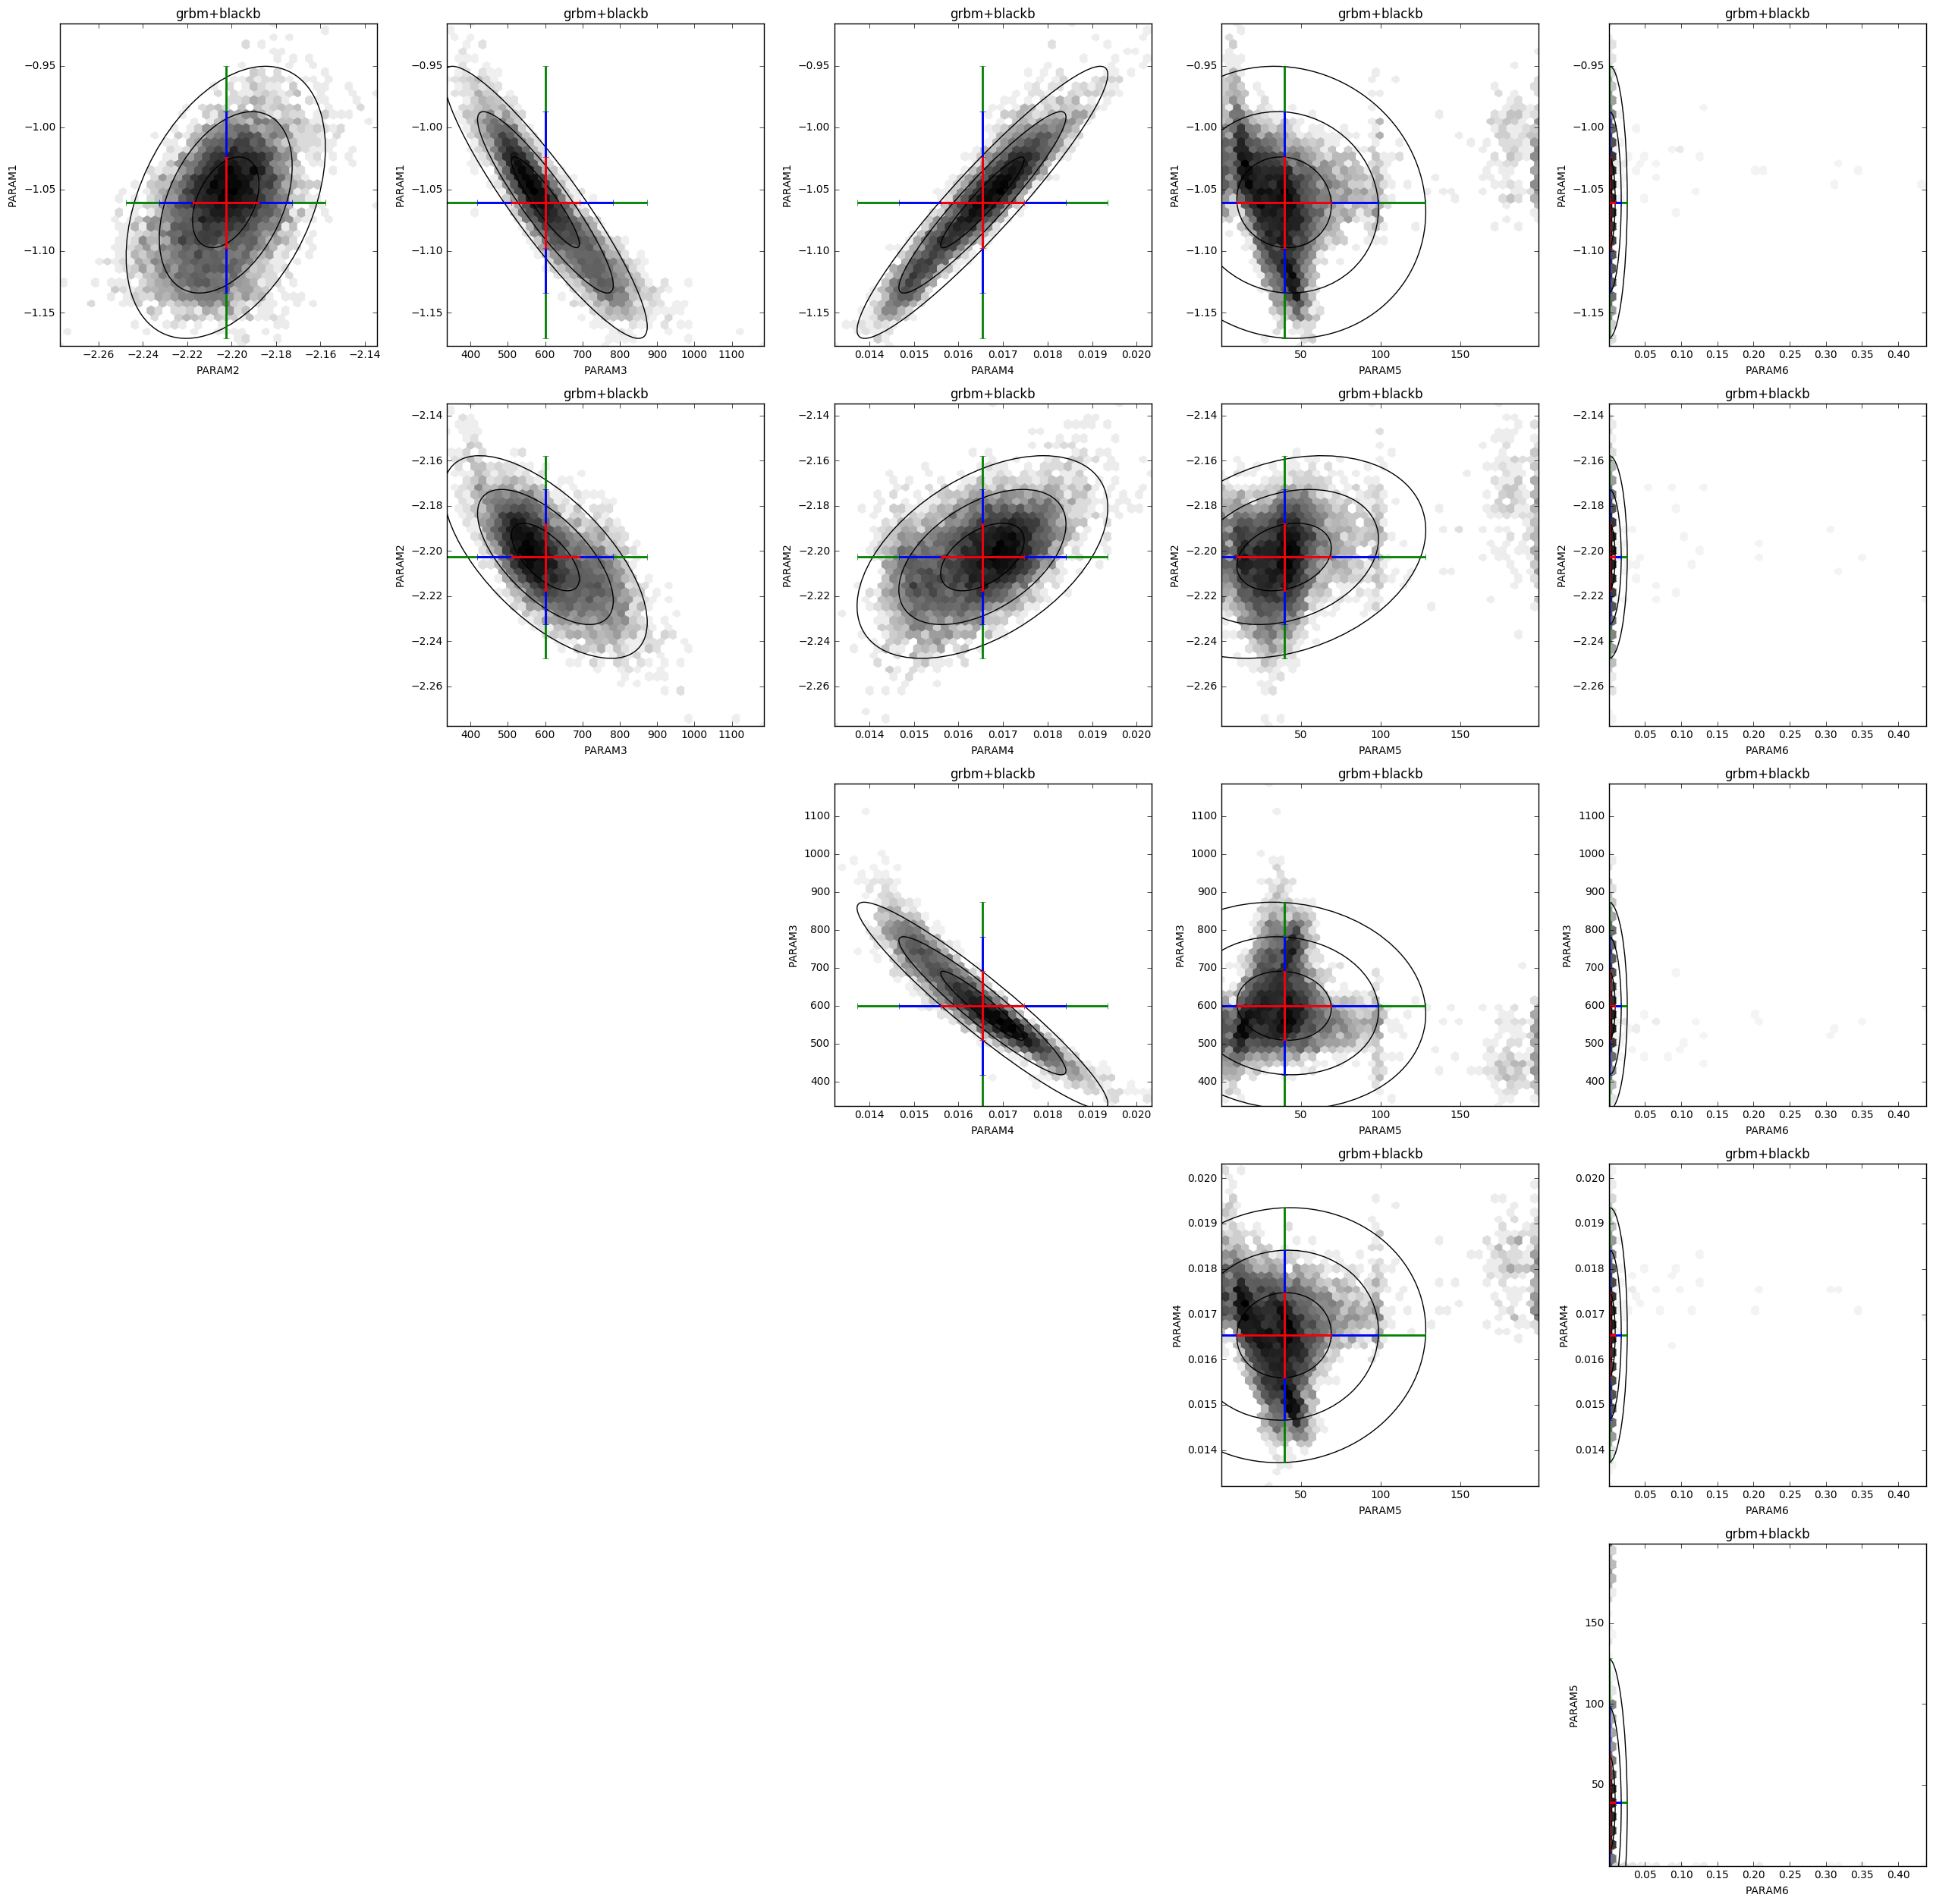

In [29]:
plt.figure(figsize=(5*nPars, 5*nPars))
for i in range(nPars):
    for j in range(i):
        ax = plt.subplot(nPars, nPars, nPars * (j + 1) + i + 1)
        Plot_ParamComparison(modname, ax, i+1, j+1)

plt.tight_layout()
#plt.savefig(pp2, format='pdf', dpi = 150, bbox_inches = 'tight')
#plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')


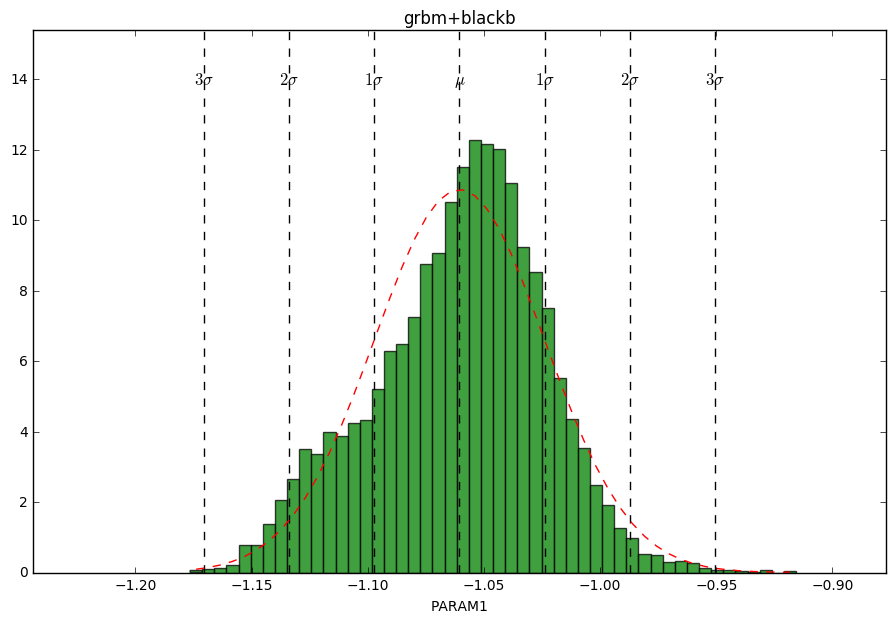

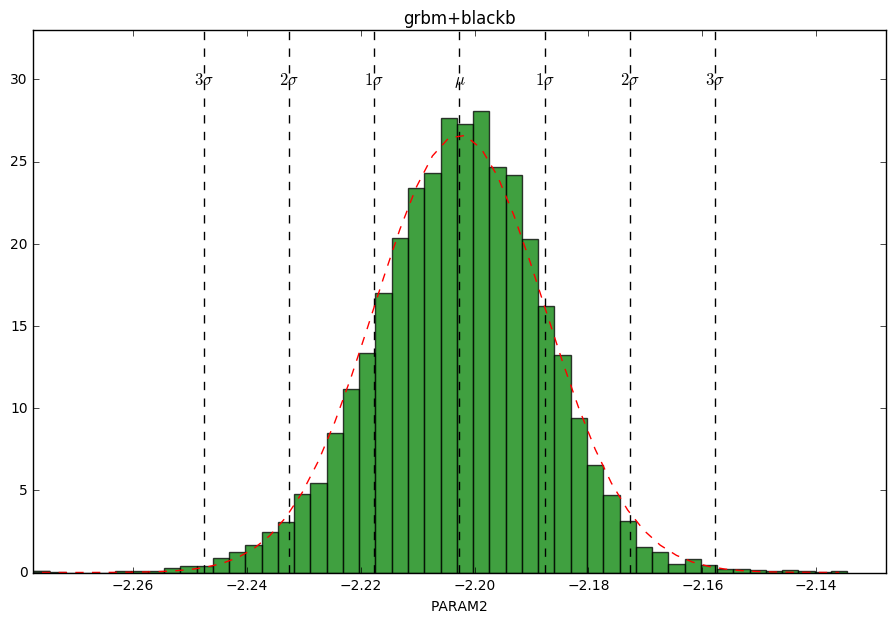

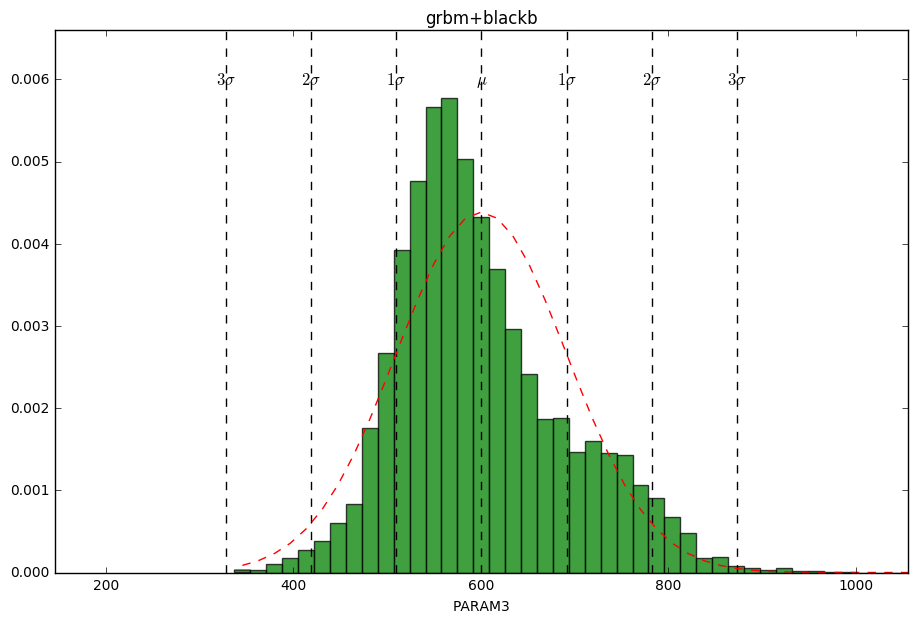

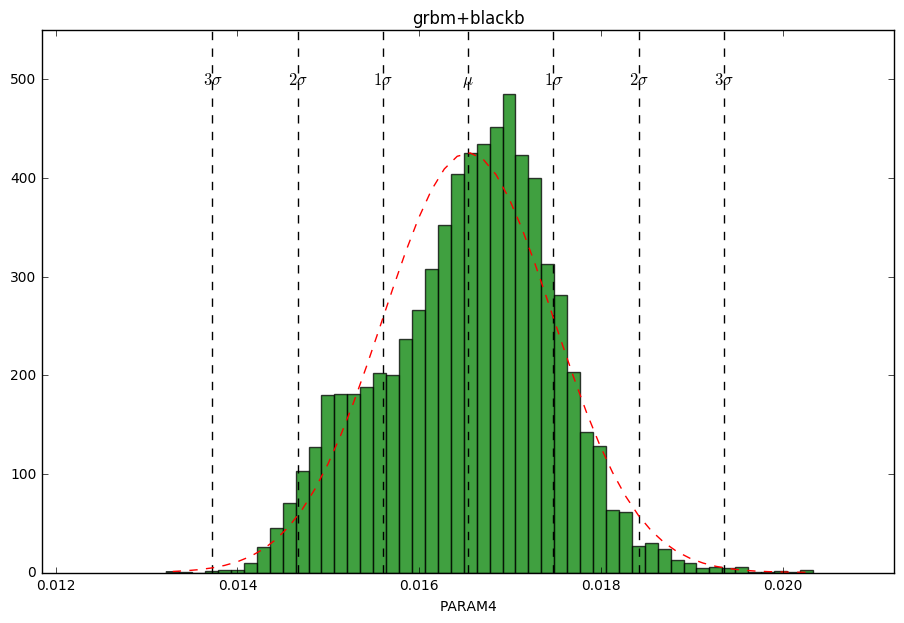

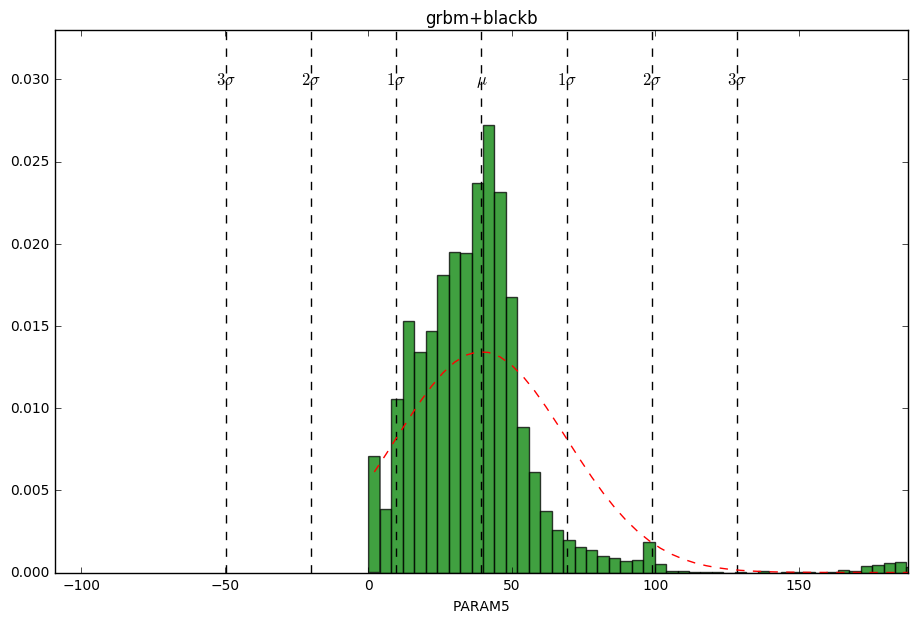

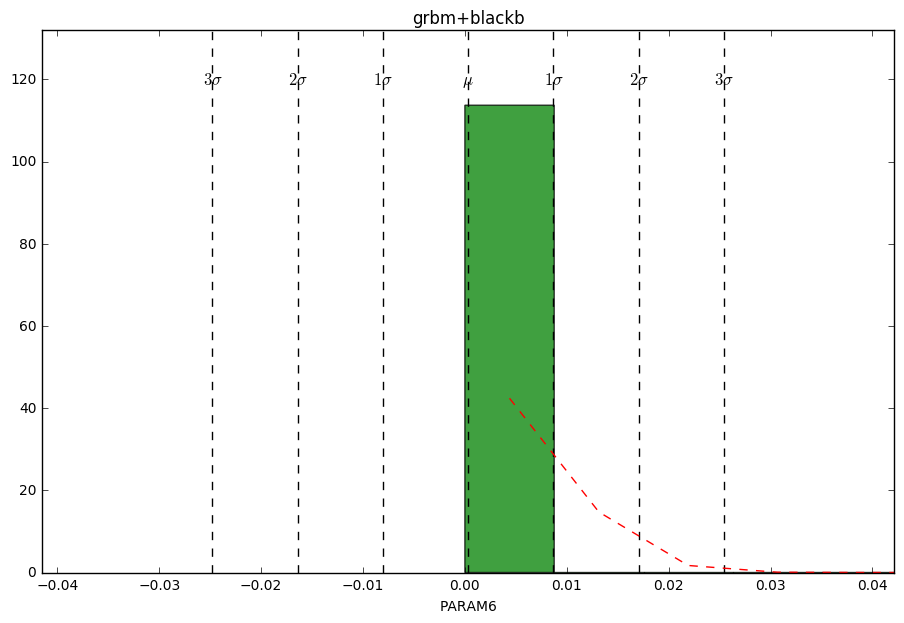

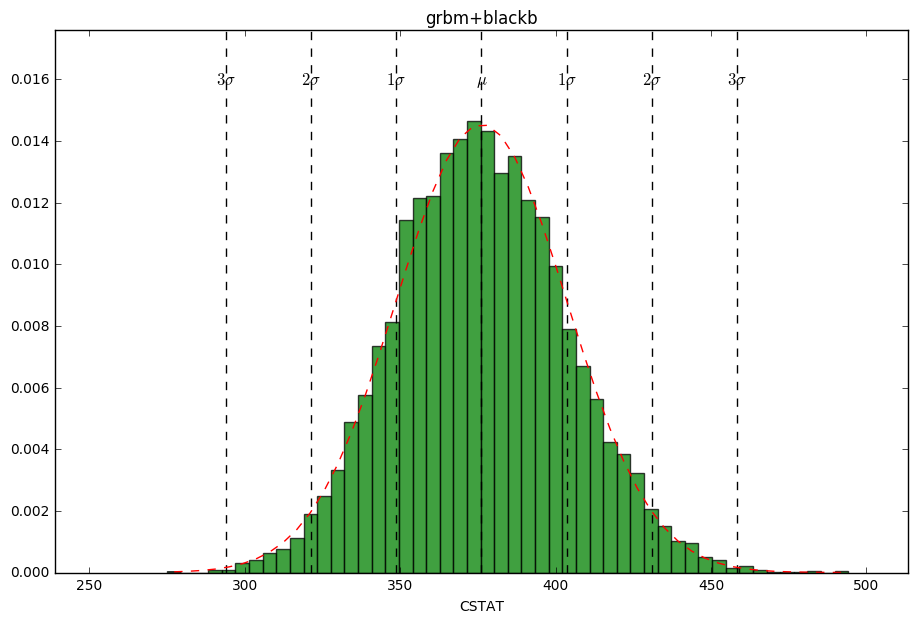

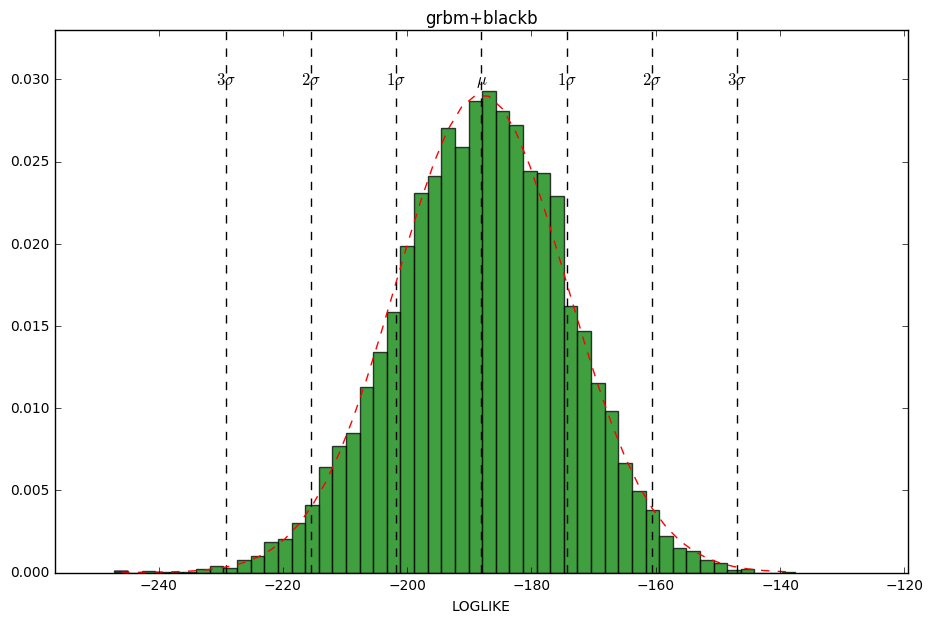

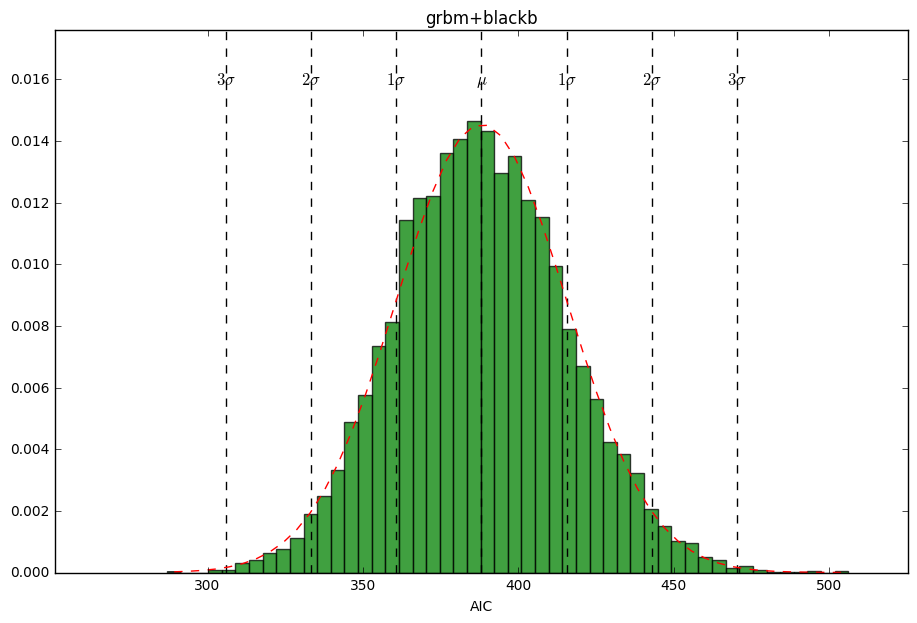

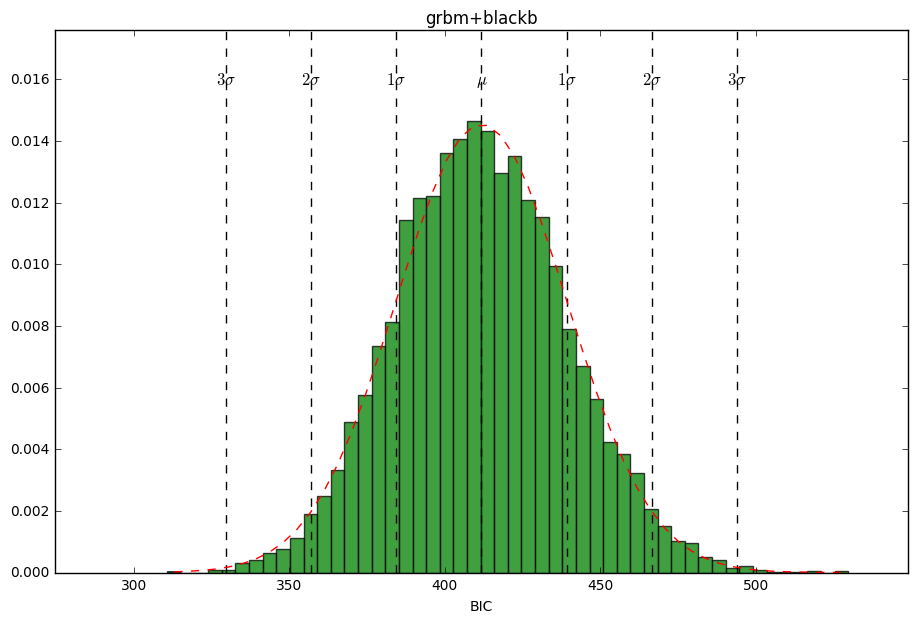

In [54]:
for name in Bdata.columns:
    if 'PARAM' in name:
        Plot_ParamDistributions(modname, name)
        #plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        Plot_ParamDistributions(modname, name)
        #plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    else:
        pass

In [13]:
#pp.close()

In [14]:
target = open(paramoutfile2, 'w')

In [15]:
for name in Bdata.columns:
    if 'PARAM' in name:
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        line1 =  "%s"%name
        line2 = "Value:    %.13f"%muX
        line3 = "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        line4 = "2-sigma:  %.13f, %.13f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        line5 = "3-sigma:  %.13f, %.13f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        line6 = "min max:  %.13f, %.13f"%(x.min(), x.max())
        #print ""
        target.write(line1)
        target.write("\n")
        target.write(line2)
        target.write("\n")
        target.write(line3)
        target.write("\n")
        target.write(line4)
        target.write("\n")
        target.write(line5)
        target.write("\n")
        target.write(line6)
        target.write("\n")
        target.write("\n")
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        line1 =  "%s"%name
        line2 = "Value:    %.13f"%muX
        line3 = "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        line4 = "2-sigma:  %.13f, %.13f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        line5 = "3-sigma:  %.13f, %.13f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        line6 = "min max:  %.13f, %.13f"%(x.min(), x.max())
        #print ""
        target.write(line1)
        target.write("\n")
        target.write(line2)
        target.write("\n")
        target.write(line3)
        target.write("\n")
        target.write(line4)
        target.write("\n")
        target.write(line5)
        target.write("\n")
        target.write(line6)
        target.write("\n")
        target.write("\n")
    else:
        pass

In [16]:
target.close()

In [17]:
param_dict = OrderedDict()
for name in Bdata.columns:
    if 'PARAM' in name:
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        # print "%s"%name
        # print "Value:    %.13f"%muX
        # print "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        # print "2-sigma:  %.10f, %.10f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        # print "3-sigma:  %.10f, %.10f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        # print ""
        param_dict["%s"%name] = [muX, muX - sigmaX, muX + sigmaX, muX - 2*sigmaX, muX + 2*sigmaX, muX - 3*sigmaX, muX + 3*sigmaX, x.min(), x.max()]
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        param_dict["%s"%name] = [muX, muX - sigmaX, muX + sigmaX, muX - 2*sigmaX, muX + 2*sigmaX, muX - 3*sigmaX, muX + 3*sigmaX, x.min(), x.max()]
    else:
        pass
        

In [18]:
outDataFrame = pd.DataFrame(param_dict)

In [19]:
outDataFrame.to_csv(path_or_buf = paramoutfile, sep = ',', header=True, index=False)

In [20]:
os.system('cp %s %s'%(outfile, outfile2))

0